<a href="https://colab.research.google.com/github/viniciusriosfuck/python-financas/blob/main/Python_para_finan%C3%A7as_classifica%C3%A7%C3%A3o_e_agrupamento_de_empresas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - classificação e agrupamento de empresas com machine learning

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Classificação de empresas com machine learning

- Esta base de dados foi criada com as informações disponibizadas no site www.bastter.com. Para o acesso de tais informações, foi necessário comprar uma conta
- Empresas com indisponibilidade de informações 
ficaram com seus respectivos campos vazios
- **Atributo situação (classe)**: este atributo recebeu valores que correspondem a boa, média ou ruim. Estas posições foram retiradas do site do www.tororadar.com e do aplicativo Dinheiro do Windows 10 

## Carregamento e pré-processamento da base de dados

In [2]:
url = "https://github.com/viniciusriosfuck/python-financas/blob/main/data/BD%20Completo.xlsx?raw=true"
dataset = pd.read_excel(url)
dataset.rename(columns={'LPA desconctado': 'LPA descontado'}, inplace=True)
print(dataset.shape)
dataset.head(1)

(377, 70)


,Situação,Empresa,Segmento,Valor de M.,EV,Majoritar.,Pes. Fisicas,Categoria,LPA,LPA descontado,VPA,P/L,P/L descontado,EV/EBITDA,P/VPA,DPA,Dividend Yield,Payout,Margem Segurança,Rec. Liquida,Luc. Liquido,Luc. Liq * NR,Resultado Bruto,Margem Bruta,EBIT,D&A,EBITDA,Margem EBITDA,Res. Financeiro,Margem Liquida,ROE,ROA,SSS,Patri. Liquido,RIF,Margem Bancaria,Indc. Eficiencia,Indc. Basileia,PDD,PDD/LL,Equity Multi.,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,Div Liquida/EBITDA,Indice de Cobertura,Despesas com juros,EF,ECP,Custo % da divida,EM,IPL,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro,FCO,FCI,FCF,FCT,FCL,FCI/LL,CAPEX,FCL CAPEX,CAPEX/LL,CAPEX/FCO
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,"Brasiliana Participaçoes (98,26%)",15969.0,alerta,0.57,0.56,36.03,24.71,24.71,NaN,0.38,0.12,0.85,21.12,-0.53,9895.0,555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0648,20.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,3501.0,2721.0,1567.0,0.86,NaN,NaN,NaN,49.0,11.0,NaN,3.94,169.0,4610.0,4508.0,545.0,1.02,0.12,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


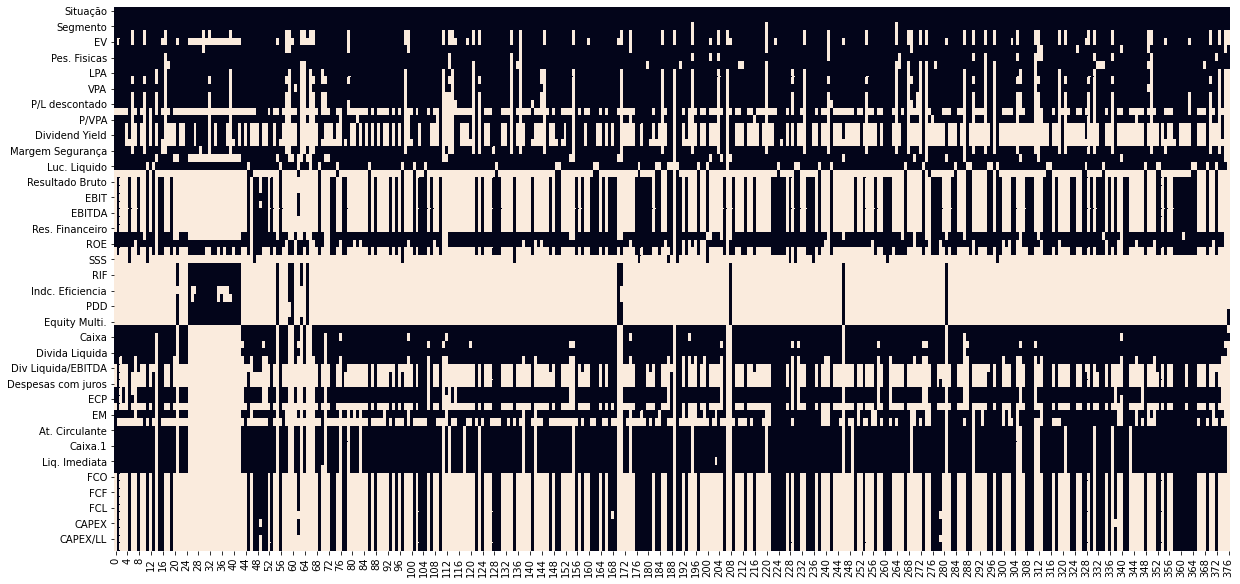

In [3]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.isnull().T, cbar=False);

In [4]:
pd.set_option('max_rows', None)
dataset.isnull().sum()

Situação                 0
Empresa                  0
Segmento                 3
Valor de M.             58
EV                      92
Majoritar.              16
Pes. Fisicas            19
Categoria               29
LPA                     41
LPA descontado          60
VPA                     38
P/L                     61
P/L descontado          66
EV/EBITDA              245
P/VPA                   64
DPA                    236
Dividend Yield         236
Payout                 257
Margem Segurança        56
Rec. Liquida            51
Luc. Liquido            52
Luc. Liq * NR          326
Resultado Bruto        240
Margem Bruta           240
EBIT                   238
D&A                    239
EBITDA                 238
Margem EBITDA          239
Res. Financeiro        239
Margem Liquida          59
ROE                     49
ROA                    222
SSS                    363
Patri. Liquido         348
RIF                    348
Margem Bancaria        348
Indc. Eficiencia       357
I

In [5]:
threshold = 0.5
mask = dataset.isnull().sum() > dataset.shape[0] * threshold
lst_col_drop = list(dataset.columns[mask])
lst_col_drop_2 = [
    'EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR', 
    'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA', 
    'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'RIF', 
    'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD',
    'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura',
    'Patri. Liquido', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI',
    'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO', 
    'Majoritar.']
list(set(lst_col_drop_2) - set(lst_col_drop))

['Majoritar.']

In [6]:
dataset["Majoritar."]  # text
dataset["Majoritar."].isnull().sum()

16

In [7]:
dataset.drop(columns=lst_col_drop_2, inplace=True)
print(dataset.shape)
pd.set_option('max_rows', 10)
dataset

(377, 32)


,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA descontado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.57,0.56,36.03,24.71,24.71,0.38,-0.53,9895.0,555.0,0.0648,20.66,2012.0,3501.000,2721.0,1567.00,0.86,49.00,11.0,3.94,4610.0,4508.0,545.0,1.02,0.12,102.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,18681.0,dividendos,0.18,0.18,0.80,14.92,14.92,3.39,22.00,2143.0,703.0,34.6900,37.00,1812.0,537.000,2997.0,2459.00,1.72,58.00,15.0,2.40,776.0,828.0,583.0,0.94,0.70,-52.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.0,alerta,0.16,0.15,2.07,31.55,31.55,2.42,-63.00,30.0,13.0,38.1500,25.00,48.0,8.000,0.0,-8.00,NaN,NaN,NaN,1.24,12.0,8.0,9.0,1.50,1.13,4.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.0,alerta,0.21,0.20,1.23,21.69,21.69,3.61,46.00,31.0,17.0,56.0000,22.00,78.0,35.000,3.0,-31.00,0.04,5.25,23.0,1.15,74.0,7.0,42.0,10.57,6.00,67.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.0,crescimento moderado,0.60,0.60,10.42,5.65,5.65,0.32,116.00,10.0,45.0,157.4500,6.00,721.0,580.000,140.0,-440.75,0.25,NaN,NaN,1.01,6.0,6.0,3.0,1.00,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomésticos,5.034333e+09,4.615333e+09,NaN,dividendos,0.21,0.21,1.69,15.64,15.64,1.94,26.00,8447.0,NaN,6.1800,24.00,2130.0,627.000,205.0,-421.00,0.09,10.00,47.0,2.63,4275.0,3598.0,756.0,1.19,0.21,677.0
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,NaN,NaN,176.0,alerta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1261.0,109.0,9.3600,11.00,1060.0,331.000,810.0,478.00,0.74,42.00,9.0,2.13,936.0,492.0,512.0,1.90,1.04,444.0
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.0,alerta,-0.52,-0.52,11.61,-7.35,-7.35,0.33,-271.00,777.0,21.0,2.2100,5.00,452.0,135.000,0.0,-135.00,NaN,NaN,NaN,1.18,179.0,59.0,46.0,3.03,0.78,120.0
375,ruim,zain participações s.a opzi,outros,NaN,NaN,2.0,alerta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.0,NaN,NaN,4.0,2.000,NaN,-2.00,NaN,NaN,NaN,NaN,4.0,1.0,1.0,4.00,1.00,3.0


In [8]:
pd.set_option('max_rows', None)
dataset.isnull().sum().sort_values(ascending=False)

EV                  92
EM                  83
Divida Bruta/PL     81
ECP                 67
P/L descontado      66
EF                  66
P/VPA               64
Liq. Imediata       61
P/L                 61
Capital de giro     61
At. Circulante      60
LPA descontado      60
Pas. Circulante     60
Caixa.1             60
Liq. Corrente       60
Margem Liquida      59
Valor de M.         58
Margem Segurança    56
Divida bruta        54
Luc. Liquido        52
Rec. Liquida        51
ROE                 49
LPA                 41
Caixa               41
VPA                 38
Divida Liquida      36
Patri. Liquido.1    33
Categoria           29
Pes. Fisicas        19
Segmento             3
Empresa              0
Situação             0
dtype: int64

In [9]:
dataset.fillna(dataset.mean(), inplace=True)
dataset.isnull().sum().sort_values(ascending=False)

Categoria           29
Segmento             3
Capital de giro      0
Liq. Imediata        0
Empresa              0
Valor de M.          0
EV                   0
Pes. Fisicas         0
LPA                  0
LPA descontado       0
VPA                  0
P/L                  0
P/L descontado       0
P/VPA                0
Margem Segurança     0
Rec. Liquida         0
Luc. Liquido         0
Margem Liquida       0
ROE                  0
Patri. Liquido.1     0
Caixa                0
Divida bruta         0
Divida Liquida       0
Divida Bruta/PL      0
EF                   0
ECP                  0
EM                   0
At. Circulante       0
Pas. Circulante      0
Caixa.1              0
Liq. Corrente        0
Situação             0
dtype: int64

In [10]:
pd.set_option('max_rows', 10)
dataset.dropna(inplace=True)
dataset.shape

(347, 32)

In [11]:
(1 - 347 / 377) * 100

7.957559681697612

## Visualização e exploração

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 376
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Situação          347 non-null    object 
 1   Empresa           347 non-null    object 
 2   Segmento          347 non-null    object 
 3   Valor de M.       347 non-null    float64
 4   EV                347 non-null    float64
 5   Pes. Fisicas      347 non-null    float64
 6   Categoria         347 non-null    object 
 7   LPA               347 non-null    float64
 8   LPA descontado    347 non-null    float64
 9   VPA               347 non-null    float64
 10  P/L               347 non-null    float64
 11  P/L descontado    347 non-null    float64
 12  P/VPA             347 non-null    float64
 13  Margem Segurança  347 non-null    float64
 14  Rec. Liquida      347 non-null    float64
 15  Luc. Liquido      347 non-null    float64
 16  Margem Liquida    347 non-null    float64
 1

In [13]:
def add_count_label(splot):
    for p in splot.patches:
        splot.annotate(
            format(p.get_height(),
                '.0f'), # number format
            (p.get_x() + p.get_width() / 2., 
            p.get_height()),
            ha='center', va='center',
            xytext=(0, 10), textcoords='offset points')

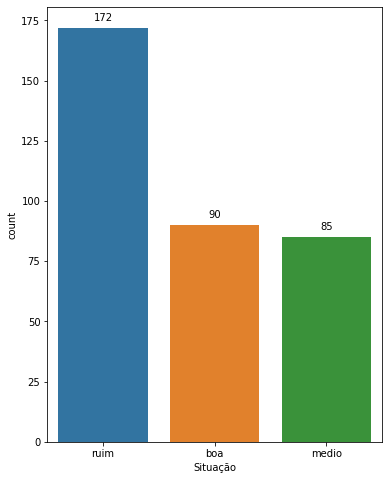

In [14]:
plt.figure(figsize=(6, 8))
splot = sns.countplot(data=dataset, x='Situação')
add_count_label(splot)

In [15]:
dataset['Situação'].value_counts()

ruim     172
boa       90
medio     85
Name: Situação, dtype: int64

In [16]:
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'acessórios', 'agriculltura', 'agricultura',
        'agua e saneamento', 'alimentos', 'alimentos diversos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'edificações',
        'eletrodomesticos', 'eletrodomésticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings divers

In [17]:
def corrige_segmento(texto):
  segmento = ''
  if texto == 'acessórios':
    segmento = 'acessorios'
  elif texto == 'agriculltura':
    segmento = 'agricultura'
  elif texto == 'alimentos diversos':
    segmento = 'alimentos'
  elif texto == 'eletrodomésticos':
    segmento = 'eletrodomesticos'
  elif texto == 'equipamentos e servicos':
    segmento = 'equipamentos'
  elif texto == 'mateial rodoviario':
    segmento = 'material rodoviario'
  elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
    segmento = 'hospitalar'
  elif texto == 'serviços de apoio e armazenamento':
    segmento = 'serviços de apoio e armazenagem'
  elif texto == 'serviços diversos s.a ctax':
    segmento = 'serviços diversos'
  elif texto == 'siderurgia':
    segmento = 'siderurgica'
  elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
    segmento = 'credito'
  elif texto == 'tansporte aereo':
    segmento = 'transporte aereo'
  else:
    segmento = texto  

  return segmento

In [18]:
corrige_segmento('tansporte aereo')

'transporte aereo'

In [19]:
dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)
dataset['Segmento'].value_counts()

energia eletrica                  40
bancos                            27
edificações                       17
fios e tecidos                    16
outros                            13
                                  ..
armas e munições                   1
motores, compressores e outros     1
minerais não metalicos             1
cervejas e refrigerantes           1
máq. E equip. industriais          1
Name: Segmento, Length: 85, dtype: int64

In [20]:
dataset['Categoria'].value_counts()

alerta                      243
crescimento moderado         48
dividendos                   36
crescimento                  17
dividendos + crescimento      2
crescimento                   1
Name: Categoria, dtype: int64

In [21]:
def corrige_categoria(texto):
  categoria = ''
  if texto == 'crescimento ':
    categoria = 'crescimento'
  else:
    categoria = texto
  
  return categoria

In [22]:
dataset['Categoria'] = dataset['Categoria'].apply(corrige_categoria)
dataset['Categoria'].value_counts()

alerta                      243
crescimento moderado         48
dividendos                   36
crescimento                  18
dividendos + crescimento      2
Name: Categoria, dtype: int64

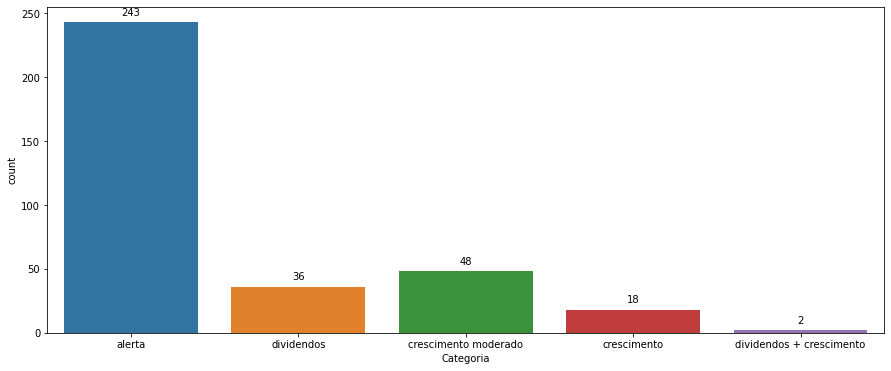

In [23]:
plt.figure(figsize=(15,6))
splot = sns.countplot(x=dataset['Categoria'])
add_count_label(splot)
# plt.xticks(rotation=90)
plt.show()

In [24]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Valor de M.,347.0,8.803913e+09,2.715437e+10,67506.00,1.651804e+08,1.362357e+09,8.596999e+09,2.866893e+11
EV,347.0,1.045164e+10,3.435244e+10,-26236953.00,3.716960e+08,3.583574e+09,1.021776e+10,4.998736e+11
Pes. Fisicas,347.0,2.226064e+04,1.309892e+05,1.00,5.805000e+02,1.773000e+03,6.354500e+03,1.803724e+06
LPA,347.0,-7.862101e+00,6.549375e+01,-806.67,-2.030000e+00,1.300000e-01,1.185000e+00,2.006600e+02
LPA descontado,347.0,-9.044851e+00,6.445679e+01,-806.66,-5.680000e+00,8.600000e-02,1.060000e+00,1.607800e+02
...,...,...,...,...,...,...,...,...
Pas. Circulante,347.0,2.637292e+03,6.880722e+03,1.00,2.035000e+02,1.022000e+03,2.536305e+03,8.116700e+04
Caixa.1,347.0,1.337299e+03,4.362187e+03,0.00,4.050000e+01,4.550000e+02,1.274284e+03,7.166400e+04
Liq. Corrente,347.0,2.068703e+00,2.903694e+00,0.00,9.700000e-01,1.660000e+00,2.023817e+00,3.075000e+01
Liq. Imediata,347.0,1.029286e+00,2.563236e+00,0.00,1.700000e-01,6.000000e-01,9.991456e-01,3.050000e+01


In [25]:
lst_empresa_min = []
lst_empresa_max = []
# list(dataset.columns)
lst_atributos = ['Divida Liquida', 'Caixa', 'LPA', 'LPA descontado', "ROE",  'Luc. Liquido']
for col in lst_atributos:
    lst_empresa_min.append(dataset["Empresa"].iloc[dataset[col].argmin()])
    lst_empresa_max.append(dataset["Empresa"].iloc[dataset[col].argmax()])
df_min_max = pd.DataFrame(
    data=[lst_atributos, lst_empresa_min, lst_empresa_max],
    index=["Atributo","EmpresaMin","EmpresaMax"])
df_min_max = df_min_max.T.set_index("Atributo")
df_min_max

,EmpresaMin,EmpresaMax
Atributo,,
Divida Liquida,sul america s.a sula,petroleo brasileiro s.a petrobras petr
Caixa,524 participações s.a,petroleo brasileiro s.a petrobras petr
LPA,siderurgica j l aliperti s.a apti,minasmaquinas s.a mmaq
LPA descontado,siderurgica j l aliperti s.a apti,hercules s.a fabrica de talheres heta
ROE,bco indusval s.a idvl,cant agpart
Luc. Liquido,centrais elet bras s.a eletrobras elet,itau unibanco holding s.a itub


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


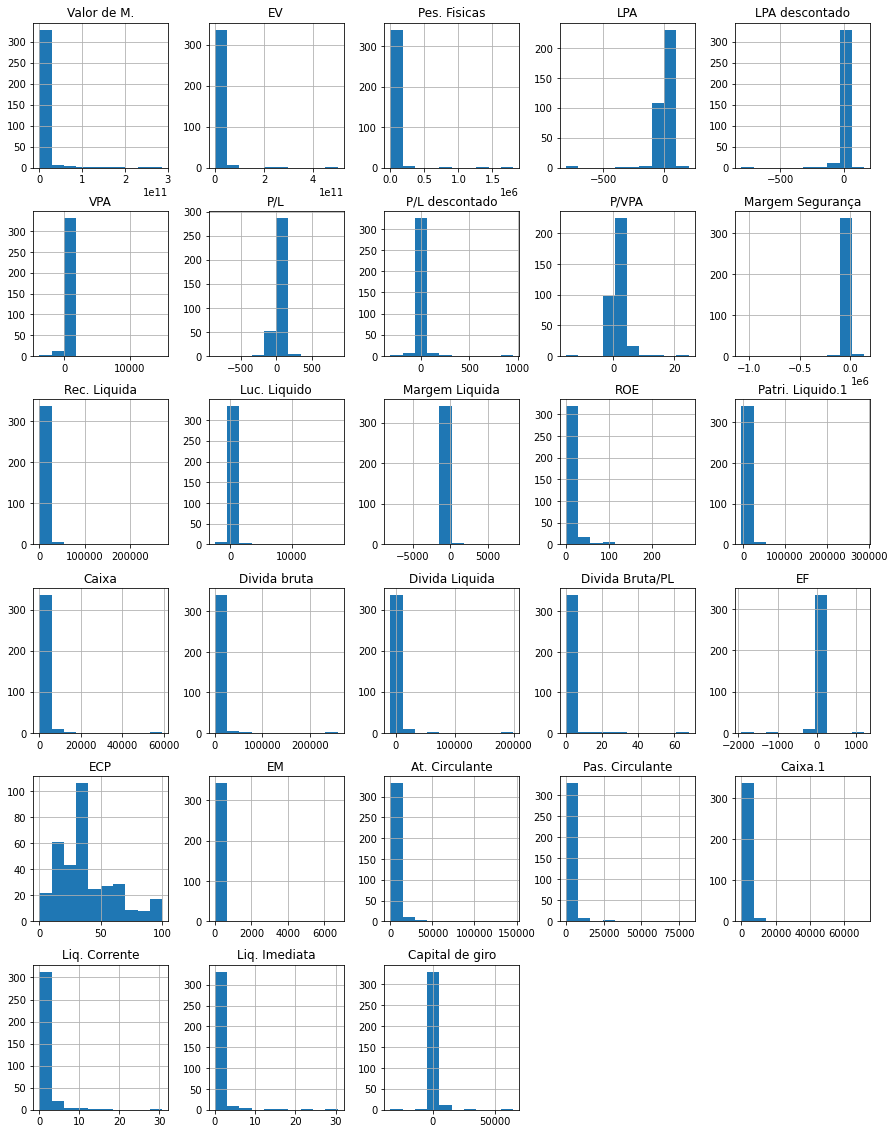

In [26]:
fig, ax = plt.subplots(figsize=(15,20))
# eixo = figura.gca()
dataset.hist(ax=ax);

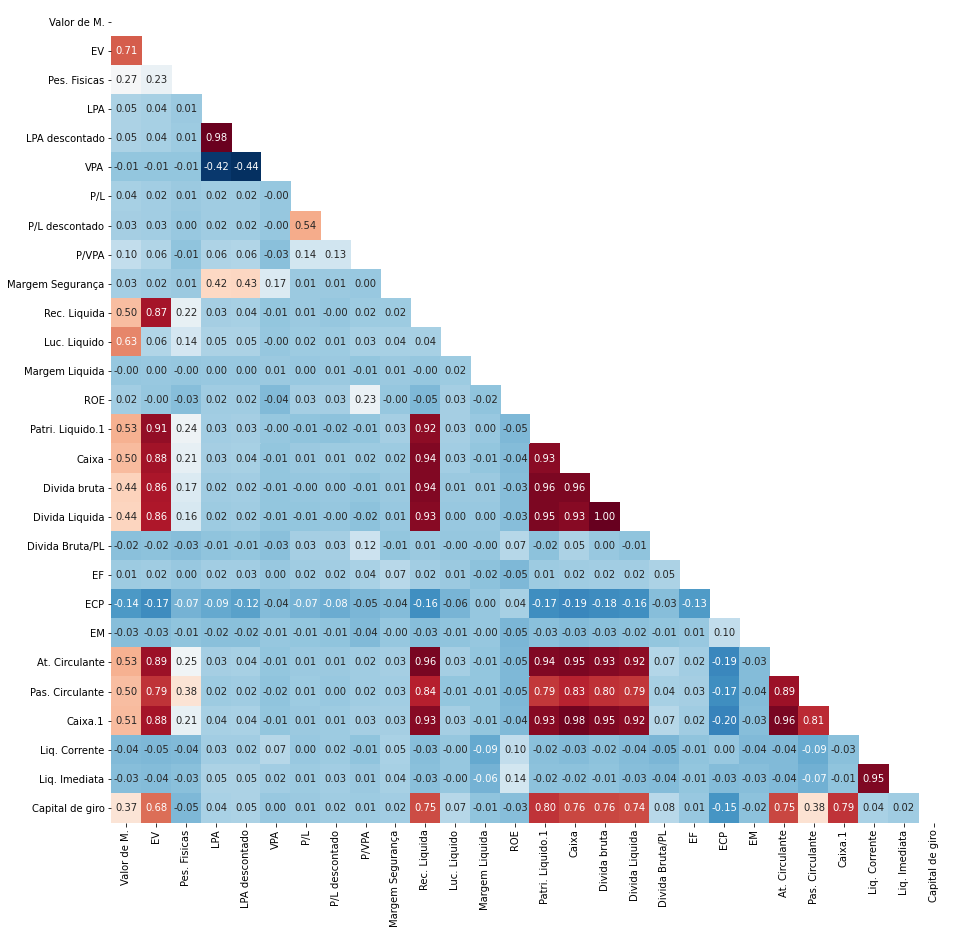

In [27]:
def plot_heatmap(dataset, figsize=(15,15)):
    plt.figure(figsize=figsize)
    sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cbar=False, cmap="RdBu_r",
                mask=np.triu(dataset.corr())
                );
plot_heatmap(dataset)

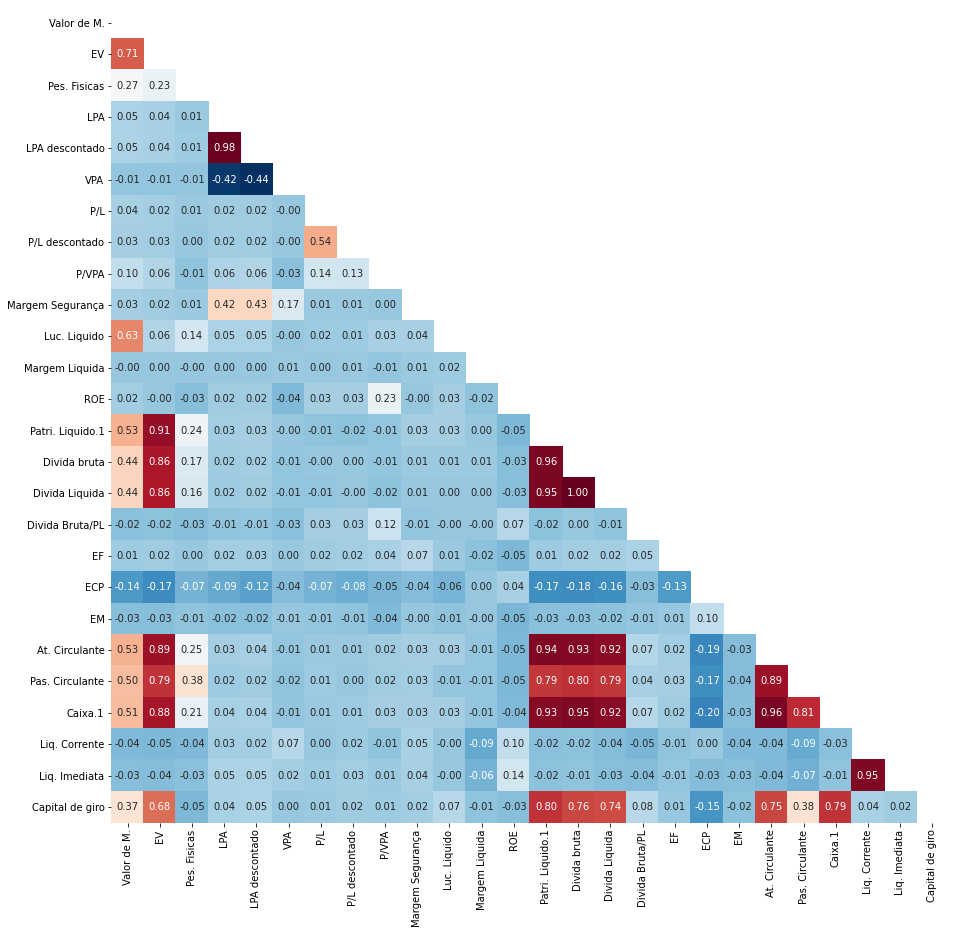

In [28]:
dataset.drop(columns=['Rec. Liquida', 'Caixa'], inplace=True)
plot_heatmap(dataset)

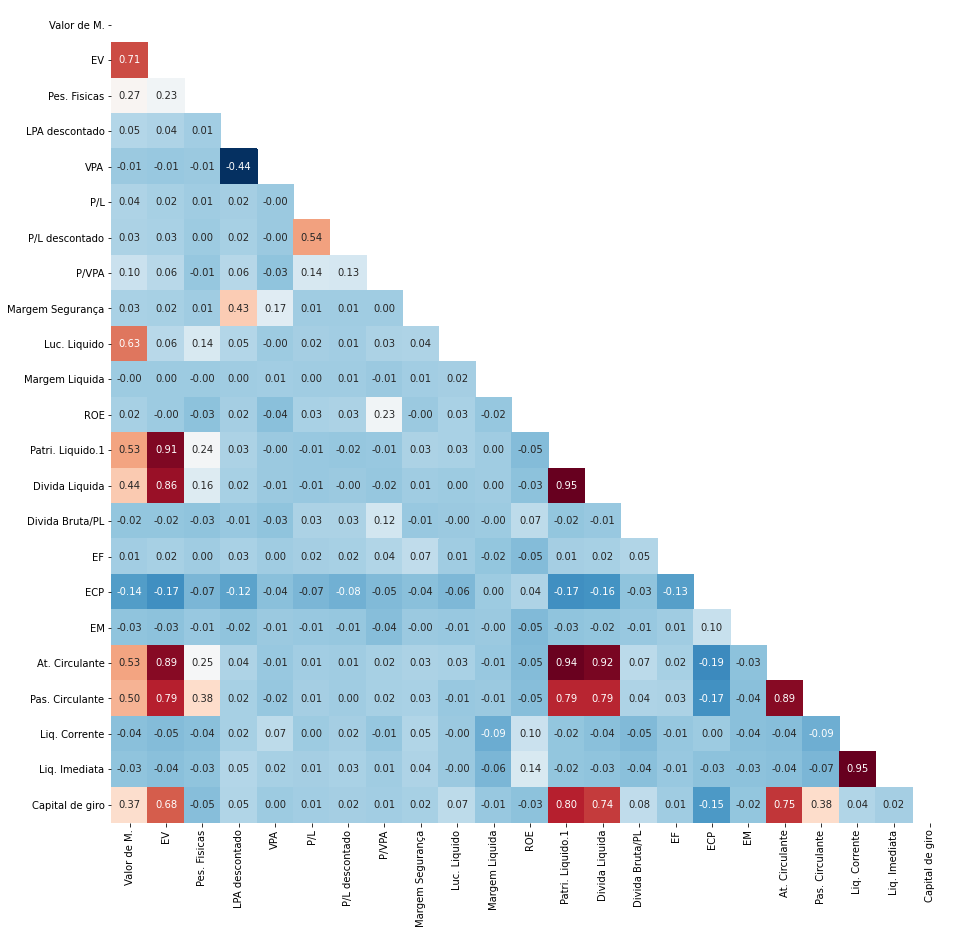

In [29]:
dataset.drop(columns=['Divida bruta', 'LPA', 'Caixa.1'], inplace=True)
plot_heatmap(dataset)

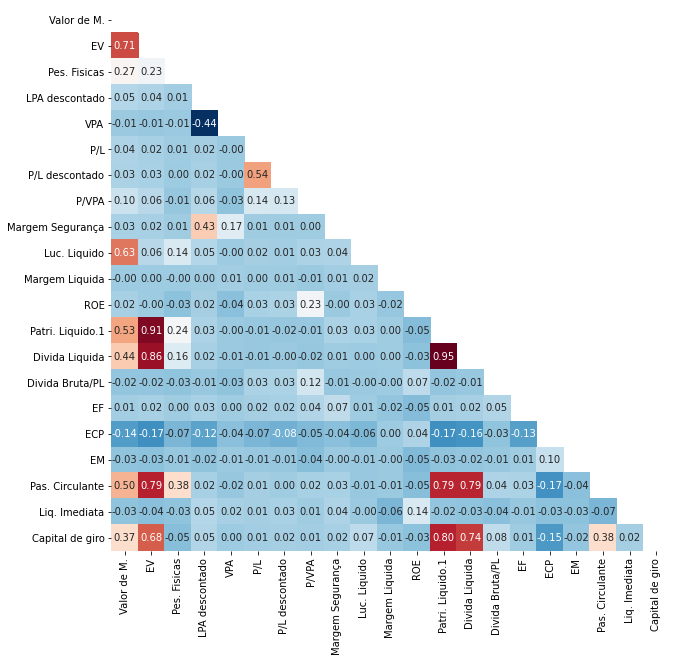

In [30]:
dataset.drop(columns=['At. Circulante', 'Liq. Corrente'], inplace=True)
plot_heatmap(dataset,figsize=(10,10))

## Variáveis dummy

In [31]:
dataset.head(1)

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA descontado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.56,36.03,24.71,24.71,0.38,-0.53,555.0,0.0648,20.66,2012.0,1567.0,0.86,49.0,11.0,3.94,4508.0,0.12,102.0


In [32]:
# aéreo - 0
# turismo - 1
# bebidas - 2
# 1 0 0
# 0 1 0
# 0 0 1

In [33]:
y = dataset['Situação'].values
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [34]:
empresa = dataset['Empresa']
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [35]:
X_cat = dataset[['Segmento', 'Categoria']]
X_cat

,Segmento,Categoria
0,energia eletrica,alerta
1,energia eletrica,dividendos
2,energia eletrica,alerta
3,energia eletrica,alerta
4,bancos,crescimento moderado
...,...,...
372,eletrodomesticos,dividendos
373,serviços de apoio e armazenagem,alerta
374,material de transporte,alerta
375,outros,alerta


In [36]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
X_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])

In [38]:
X_cat.shape

(347, 90)

In [39]:
type(X_cat)

numpy.ndarray

In [40]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [41]:
dataset_original = dataset.copy()

In [42]:
dataset.drop(columns=['Segmento', 'Categoria', 'Situação', 'Empresa'], 
             inplace=True)

In [43]:
dataset

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000
373,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000
374,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,2.210000,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000
375,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,12.658474,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000


In [44]:
dataset.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            366, 367, 369, 370, 371, 372, 373, 374, 375, 376],
           dtype='int64', length=347)

In [45]:
X_cat.index

RangeIndex(start=0, stop=347, step=1)

In [46]:
dataset.index = X_cat.index  # reset_index  (drop 30 registros nan e não resetou index)

In [47]:
dataset.index, X_cat.index

(RangeIndex(start=0, stop=347, step=1), RangeIndex(start=0, stop=347, step=1))

In [48]:
dataset = pd.concat([dataset, X_cat], axis = 1)
dataset

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.35000

In [49]:
onehotencoder.categories_

[array(['acessorios', 'agricultura', 'agua e saneamento', 'alimentos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'credito',
        'edificações', 'eletrodomesticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings diversificadas', 'hospitalar', 'hotelaria',
        'intermediação imobilia

## Normalização

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_normalizado = scaler.fit_transform(dataset)

In [51]:
dataset_normalizado

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [52]:
dataset_normalizado[0]

array([4.65507421e-03, 8.83755803e-03, 8.85280057e-03, 8.34387662e-01,
       2.05380580e-01, 5.15880181e-01, 2.66367295e-01, 3.95936571e-01,
       8.89262572e-01, 1.53146818e-01, 4.87787134e-01, 7.23820201e-02,
       2.22420717e-02, 5.02049230e-02, 1.26470588e-02, 6.31697145e-01,
       1.10000000e-01, 4.35870506e-04, 5.55281768e-02, 3.93442623e-03,
       3.45650017e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [53]:
X = dataset_normalizado.copy()
X

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [54]:
X.shape

(347, 111)

In [55]:
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

## Aplicação e avaliação dos algoritmos

In [56]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [57]:
dataset.shape

(347, 111)

In [58]:
# input = len(dataset)  # numero de entradas ou de atributos?
# 3 saidas (classes)

hidden_layer = int((len(dataset) + 3) / 2)
hidden_layer
# (347 + 3) / 2

175

In [59]:
%%time
resultados_forest = []
resultados_neural = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv=kfold)
  resultados_forest.append(scores.mean())

  network = MLPClassifier(hidden_layer_sizes=(hidden_layer, hidden_layer))
  scores = cross_val_score(network, X, y, cv=kfold)
  resultados_neural.append(scores.mean())

resultados_forest = np.array(resultados_forest)
resultados_neural = np.array(resultados_neural)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CPU times: user 17min 31s, sys: 9min 17s, total: 26min 49s
Wall time: 14min 15s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [60]:
resultados_forest

array([0.64529412, 0.65739496, 0.62218487, 0.66588235, 0.63344538,
       0.64563025, 0.64218487, 0.64596639, 0.63689076, 0.65436975,
       0.61941176, 0.64260504, 0.6602521 , 0.65630252, 0.63369748,
       0.63966387, 0.63697479, 0.63151261, 0.65428571, 0.64      ,
       0.64      , 0.63966387, 0.63168067, 0.64865546, 0.62865546,
       0.63428571, 0.66563025, 0.63941176, 0.64848739, 0.64840336])

In [61]:
resultados_neural

array([0.55268908, 0.54176471, 0.54168067, 0.54731092, 0.52689076,
       0.55277311, 0.5389916 , 0.52445378, 0.53596639, 0.55302521,
       0.56731092, 0.52773109, 0.54168067, 0.54462185, 0.54495798,
       0.55084034, 0.55336134, 0.55394958, 0.54176471, 0.54159664,
       0.53890756, 0.57008403, 0.53369748, 0.52756303, 0.53352941,
       0.55008403, 0.54512605, 0.55613445, 0.56487395, 0.53941176])

In [62]:
resultados_forest.mean(), resultados_neural.mean()

(0.6429607843137255, 0.5447591036414566)

## Avaliação com base de treinamento e teste

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [64]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2)

In [65]:
X_treinamento.shape, y_treinamento.shape

((277, 111), (277,))

In [66]:
X_teste.shape, y_teste.shape

((70, 111), (70,))

In [67]:
random_forest = RandomForestClassifier()
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
previsoes = random_forest.predict(X_teste)

In [69]:
previsoes

array(['boa', 'ruim', 'ruim', 'medio', 'medio', 'ruim', 'ruim', 'ruim',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'ruim', 'boa',
       'boa', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'boa', 'ruim', 'ruim', 'ruim', 'ruim',
       'boa', 'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'boa', 'ruim',
       'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'medio', 'boa', 'boa',
       'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim'], dtype=object)

In [70]:
y_teste

array(['boa', 'ruim', 'ruim', 'ruim', 'boa', 'boa', 'medio', 'ruim',
       'ruim', 'ruim', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'medio',
       'medio', 'boa', 'medio', 'medio', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'boa', 'ruim', 'ruim', 'medio', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'medio', 'boa', 'ruim', 'medio', 'medio', 'ruim', 'boa', 'ruim',
       'boa', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'ruim', 'ruim', 'ruim', 'boa', 'medio', 'boa', 'boa',
       'boa', 'ruim', 'ruim', 'medio', 'ruim', 'ruim'], dtype=object)

In [71]:
accuracy_score(y_teste, previsoes)

0.6428571428571429

In [72]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[ 9,  2,  6],
       [ 4,  5, 12],
       [ 0,  1, 31]])

In [73]:
(10 + 7 + 31) / 70

0.6857142857142857

* dados desbalanceados: f1 score mais justo
* talvez retirar classe média, terá resultados melhores

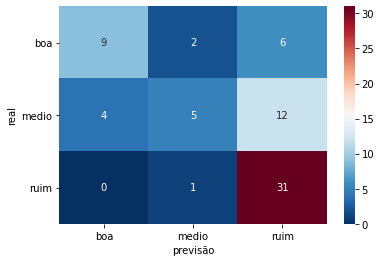

In [74]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap="RdBu_r")
positions = (0.5,1.5,2.5)
labels = list(random_forest.classes_)
plt.xticks(positions, labels)
plt.yticks(positions, labels, rotation=0)
plt.xlabel('previsão')
plt.ylabel('real')
plt.show()

In [75]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         boa       0.69      0.53      0.60        17
       medio       0.62      0.24      0.34        21
        ruim       0.63      0.97      0.77        32

    accuracy                           0.64        70
   macro avg       0.65      0.58      0.57        70
weighted avg       0.64      0.64      0.60        70



In [76]:
X_teste[0].shape

(111,)

In [77]:
X_teste[0].reshape(1, -1)

array([[0.3273851 , 0.02049209, 0.08448526, 0.8348218 , 0.2040534 ,
        0.50862298, 0.25645323, 0.41278494, 0.88926054, 0.47049073,
        0.48855489, 0.02802789, 0.02802857, 0.05266984, 0.02530604,
        0.62577759, 0.38872065, 0.00916918, 0.03123605, 0.03275887,
        0.35185083, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [78]:
random_forest.predict(X_teste[12].reshape(1, -1))

array(['ruim'], dtype=object)

In [79]:
np.argmax(random_forest.feature_importances_)

3

In [80]:
df_importancias = (pd.DataFrame(
    list(zip(dataset.columns, random_forest.feature_importances_)), 
    columns=["Atributo","Importancia"])
.set_index("Atributo")
.sort_values(by="Importancia",ascending=False))
df_importancias.head(20)

,Importancia
Atributo,
LPA descontado,0.067054
Patri. Liquido.1,0.051594
Valor de M.,0.051492
Luc. Liquido,0.051291
Margem Segurança,0.051224
...,...
Liq. Imediata,0.034465
ECP,0.033498
Capital de giro,0.032435


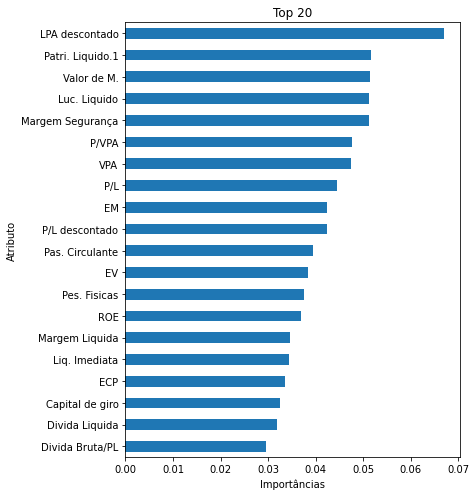

In [81]:
N = 20
df_importancias.head(N).plot(
    kind="barh",
    align='center',
    figsize=(6,8),
    legend=False)
plt.xlabel('Importâncias')
plt.title(f'Top {N}')
plt.gca().invert_yaxis()
plt.show()

In [82]:
import pickle

In [83]:
with open('bases_classificacao.pkl', 'wb') as f:
  pickle.dump([dataset, dataset_original, X, y, empresa, scaler], f)

## Exercício

In [84]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
parametros = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 4, 6],
              'n_estimators': [50, 100, 150]}

In [86]:
%%time
from sklearn.model_selection import GridSearchCV  # Cross Validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parametros
    )
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params, best_score)

{'criterion': 'entropy', 'min_samples_split': 4, 'n_estimators': 150} 0.6658799171842651
CPU times: user 18.3 s, sys: 77.8 ms, total: 18.4 s
Wall time: 18.5 s


## Agrupamento de empresas

### Preparação da base de dados

In [87]:
# https://github.com/viniciusriosfuck/python-financas/blob/main/data/bases_classificacao.pkl?raw=true

import pickle
with open('bases_classificacao.pkl', 'rb') as f:
  dataset, dataset_original, X, y, empresa, scaler = pickle.load(f)
pd.set_option('max_rows', 10)
dataset

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.35000

In [88]:
dataset_original

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA descontado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,alerta,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,dividendos,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,alerta,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,alerta,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,crescimento moderado,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,dividendos,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,alerta,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,2.210000,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000
375,ruim,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,12.658474,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000


In [89]:
X

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [90]:
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [91]:
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [92]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

### Obtenção do número de clusters

In [93]:
from sklearn.cluster import KMeans

In [94]:
%%time
wcss = [] # within cluster sum of squares
faixa = range(1, 21)
for i in faixa:
  #print(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

CPU times: user 2.84 s, sys: 2.49 s, total: 5.33 s
Wall time: 2.75 s


In [95]:
print(wcss)

[549.5537304637769, 447.0755844180393, 406.3726830716314, 381.83364811385786, 369.82824166623885, 345.3078137584479, 328.5665563929278, 320.59655417121166, 312.6581486586221, 303.26051145840074, 291.08539661638275, 287.3302042114889, 281.16370270585656, 277.79673259261494, 260.40308279362193, 259.1122219840578, 255.9725108984838, 248.89234394426813, 247.42664538784302, 245.65049192543083]


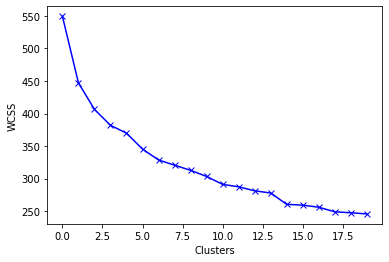

In [96]:
import matplotlib.pyplot as plt
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

6-7 clusters

### Agrupamento com k-means

In [ ]:
n_clusters = 7

In [97]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
labels = kmeans.labels_
labels, len(labels)

(array([3, 2, 3, 3, 5, 1, 1, 1, 5, 3, 4, 2, 4, 5, 1, 1, 5, 1, 4, 0, 1, 4,
        0, 5, 1, 1, 5, 5, 5, 2, 5, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 5,
        4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 4, 1, 1, 1, 2, 1, 1, 1, 4, 2,
        1, 1, 4, 3, 2, 3, 4, 3, 1, 4, 2, 3, 2, 1, 3, 3, 2, 3, 5, 5, 2, 3,
        3, 5, 4, 5, 0, 2, 4, 4, 4, 3, 4, 5, 1, 0, 5, 1, 4, 4, 5, 1, 1, 4,
        1, 6, 4, 4, 1, 1, 5, 1, 3, 3, 6, 1, 5, 2, 6, 1, 4, 0, 5, 4, 1, 5,
        6, 4, 5, 1, 1, 2, 1, 3, 2, 2, 1, 1, 2, 3, 1, 3, 3, 1, 4, 0, 0, 2,
        4, 1, 6, 5, 5, 3, 5, 2, 1, 1, 4, 4, 1, 1, 0, 1, 5, 6, 1, 1, 1, 1,
        4, 5, 5, 1, 1, 1, 6, 1, 4, 0, 4, 1, 5, 4, 1, 4, 1, 5, 1, 1, 5, 5,
        1, 1, 1, 1, 6, 6, 0, 1, 4, 1, 1, 0, 3, 5, 1, 2, 1, 5, 1, 1, 1, 5,
        0, 1, 1, 2, 1, 4, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1,
        1, 2, 1, 6, 5, 2, 4, 2, 2, 1, 4, 4, 2, 4, 1, 1, 1, 2, 5, 1, 6, 1,
        0, 4, 1, 5, 2, 1, 4, 1, 1, 5, 5, 0, 1, 4, 3, 1, 3, 1, 1, 4, 6, 6,
        1, 1, 1, 4, 1, 1, 0, 1, 1, 1, 

In [99]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([ 18, 145,  38,  25,  57,  48,  16]))

In [100]:
import pandas as pd
centroides = pd.DataFrame(
    data=kmeans.cluster_centers_,
    columns=[dataset.columns]
    )
centroides

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.028427,0.017186,0.006654,0.834481,0.204368,0.514168,0.264594,0.437256,0.888884,0.135521,0.488292,0.034062,0.022867,0.046557,0.014969,0.627100,0.341525,0.022444,0.017185,0.020070,0.353083,-8.673617e-19,5.555556e-02,5.555556e-02,1.111111e-01,5.555556e-02,-4.336809e-19,-4.336809e-19,0.000000e+00,-1.734723e-18,5.555556e-02,1.111111e-01,-4.336809e-19,-8.673617e-19,-8.673617e-19,-1.734723e-18,-3.469447e-18,-4.336809e-19,-4.336809e-19,-8.673617e-19,...,-3.469447e-18,5.555556e-02,-1.734723e-18,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19,0.000000,0.000000e+00,-1.734723e-18,-4.336809e-19,-8.673617e-19,5.555556e-02,-1.734723e-18,-8.673617e-19,-4.336809e-19,-4.336809e-19,-1.734723e-18,-8.673617e-19,-1.734723e-18,-4.336809e-19,0.000000e+00,0.000000e+00,5.555556e-02,-8.673617e-19,0.000000e+00,-3.469447e-18,-3.469447e-18,-1.734723e-18,-1.734723e-18,5.555556e-02,-8.673617e-19,-8.673617e-19,-4.336809e-19,-4.336809e-19,0.000000e+00,1.000000e+00,-2.775558e-17,-2.775558e-17,-8.673617e-19
1,0.023048,0.024154,0.008837,0.831549,0.204162,0.504244,0.254432,0.414583,0.881551,0.128784,0.488348,0.053229,0.034086,0.060848,0.034605,0.628382,0.314551,0.005988,0.042155,0.033457,0.355681,6.896552e-03,2.068966e-02,6.896552e-03,6.896552e-03,6.938894e-18,6.896552e-03,6.896552e-03,2.758621e-02,6.896552e-03,1.379310e-02,7.586207e-02,3.469447e-18,6.938894e-18,6.896552e-03,6.896552e-03,2.758621e-02,3.469447e-18,3.469447e-18,6.896552e-03,...,1.379310e-02,2.758621e-02,2.068966e-02,3.469447e-18,3.469447e-18,6.896552e-03,6.896552e-03,0.082759,3.448276e-02,1.379310e-02,3.469447e-18,6.896552e-03,2.068966e-02,6.896552e-03,1.379310e-02,6.896552e-03,3.469447e-18,0.000000e+00,6.938894e-18,1.387779e-17,6.896552e-03,3.448276e-02,2.068966e-02,6.938894e-18,6.938894e-18,2.758621e-02,2.758621e-02,2.758621e-02,2.068966e-02,2.758621e-02,6.896552e-03,1.379310e-02,6.896552e-03,3.469447e-18,3.469447e-18,1.000000e+00,1.873501e-16,0.000000e+00,3.747003e-16,6.938894e-18
2,0.040947,0.024032,0.053098,0.835895,0.204808,0.538444,0.281158,0.471303,0.890154,0.147329,0.496659,0.079525,0.028263,0.049572,0.018254,0.628042,0.341209,0.001699,0.033292,0.042601,0.347997,2.602085e-18,5.204170e-18,2.631579e-02,5.204170e-18,2.602085e-18,1.301043e-18,1.301043e-18,2.631579e-02,2.631579e-02,0.000000e+00,1.315789e-01,2.631579e-02,2.602085e-18,2.602085e-18,5.204170e-18,0.000000e+00,1.301043e-18,1.301043e-18,2.602085e-18,...,2.631579e-02,0.000000e+00,0.000000e+00,1.301043e-18,1.301043e-18,1.301043e-18,1.301043e-18,0.000000,6.938894e-18,0.000000e+00,1.301043e-18,2.631579e-02,2.631579e-02,2.631579e-02,2.602085e-18,1.301043e-18,2.631579e-02,2.631579e-02,2.602085e-18,2.631579e-02,1.301043e-18,6.938894e-18,6.938894e-18,2.631579e-02,2.602085e-18,6.938894e-18,2.631579e-02,5.263158e-02,0.000000e+00,5.204170e-18,2.602085e-18,2.602085e-18,2.631579e-02,2.631579e-02,1.301043e-18,0.000000e+00,-1.387779e-17,0.000000e+00,9.473684e-01,5.263158e-02
3,0.016671,0.018382,0.005652,0.834145,0.204464,0.510562,0.250310,0.417361,0.885140,0.127368,0.486186,0.055925,0.031643,0.057152,0.019919,0.613659,0.214298,0.002466,0.042174,0.025664,0.342982,-8.673617e-19,-1.734723e-18,-1.734723e-18,-1.734723e-18,-8.673617e-19,-4.336809e-19,-4.336809e-19,6.938894e-18,-1.734723e-18,-5.204170e-18,-1.387779e-17,-4.336809e-19,-8.673617e-19,-8.673617e-19,-1.734723e-18,-1.040834e-17,-4.336809e-19,-4.336809e-19,-8.673617e-19,...,-6.938894e-18,-1.040834e-17,-5.204170e-18,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19,0.000000,6.938894e-18,-5.204170e-18,-4.336809e-19,-8.673617e-19,6.938894e-18,-1.734723e-18,-8.673617e-19,-4.336809e-19,-4.336809e

In [101]:
centroides = scaler.inverse_transform(centroides)
centroides = pd.DataFrame(data=centroides, columns=[dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,8.149813e+09,8.565072e+09,12003.833333,0.650388,17.091778,21.751665,22.466590,2.047645,-459.608408,204.087863,8.340942,9.722222,2195.253876,807.779453,1.017868,34.672083,34.152452,151.885208,1395.867206,0.612127,836.225387,-8.673617e-19,5.555556e-02,5.555556e-02,1.111111e-01,5.555556e-02,-4.336809e-19,-4.336809e-19,0.000000e+00,-1.734723e-18,5.555556e-02,1.111111e-01,-4.336809e-19,-8.673617e-19,-8.673617e-19,-1.734723e-18,-3.469447e-18,-4.336809e-19,-4.336809e-19,-8.673617e-19,...,-3.469447e-18,5.555556e-02,-1.734723e-18,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19,0.000000,0.000000e+00,-1.734723e-18,-4.336809e-19,-8.673617e-19,5.555556e-02,-1.734723e-18,-8.673617e-19,-4.336809e-19,-4.336809e-19,-1.734723e-18,-8.673617e-19,-1.734723e-18,-4.336809e-19,0.000000e+00,0.000000e+00,5.555556e-02,-8.673617e-19,0.000000e+00,-3.469447e-18,-3.469447e-18,-1.734723e-18,-1.734723e-18,5.555556e-02,-8.673617e-19,-8.673617e-19,-4.336809e-19,-4.336809e-19,0.000000e+00,1.000000e+00,-2.775558e-17,-2.775558e-17,-8.673617e-19
1,6.607634e+09,1.204832e+10,15940.031786,-2.185912,13.241270,4.604131,9.612858,1.132572,-9363.441610,69.962525,9.262406,15.193243,5485.978228,3782.035735,2.353167,38.666671,31.455105,41.264033,3422.520349,1.020438,1092.861458,6.896552e-03,2.068966e-02,6.896552e-03,6.896552e-03,6.938894e-18,6.896552e-03,6.896552e-03,2.758621e-02,6.896552e-03,1.379310e-02,7.586207e-02,3.469447e-18,6.938894e-18,6.896552e-03,6.896552e-03,2.758621e-02,3.469447e-18,3.469447e-18,6.896552e-03,...,1.379310e-02,2.758621e-02,2.068966e-02,3.469447e-18,3.469447e-18,6.896552e-03,6.896552e-03,0.082759,3.448276e-02,1.379310e-02,3.469447e-18,6.896552e-03,2.068966e-02,6.896552e-03,1.379310e-02,6.896552e-03,3.469447e-18,0.000000e+00,6.938894e-18,1.387779e-17,6.896552e-03,3.448276e-02,2.068966e-02,6.938894e-18,6.938894e-18,2.758621e-02,2.758621e-02,2.758621e-02,2.068966e-02,2.758621e-02,6.896552e-03,1.379310e-02,6.896552e-03,3.469447e-18,3.469447e-18,1.000000e+00,1.873501e-16,0.000000e+00,3.747003e-16,6.938894e-18
2,1.173926e+10,1.198756e+10,95774.401794,2.018158,25.326316,63.699737,43.418385,3.421779,1082.317070,439.177490,145.585205,22.698947,3777.992350,1435.297407,1.241287,37.606216,34.120861,12.433980,2703.206030,1.299339,333.872918,2.602085e-18,5.204170e-18,2.631579e-02,5.204170e-18,2.602085e-18,1.301043e-18,1.301043e-18,2.631579e-02,2.631579e-02,0.000000e+00,1.315789e-01,2.631579e-02,2.602085e-18,2.602085e-18,5.204170e-18,0.000000e+00,1.301043e-18,1.301043e-18,2.602085e-18,...,2.631579e-02,0.000000e+00,0.000000e+00,1.301043e-18,1.301043e-18,1.301043e-18,1.301043e-18,0.000000,6.938894e-18,0.000000e+00,1.301043e-18,2.631579e-02,2.631579e-02,2.631579e-02,2.602085e-18,1.301043e-18,2.631579e-02,2.631579e-02,2.602085e-18,2.631579e-02,1.301043e-18,6.938894e-18,6.938894e-18,2.631579e-02,2.602085e-18,6.938894e-18,2.631579e-02,5.263158e-02,0.000000e+00,5.204170e-18,2.602085e-18,2.602085e-18,2.631579e-02,2.631579e-02,1.301043e-18,0.000000e+00,-1.387779e-17,0.000000e+00,9.473684e-01,5.263158e-02
3,4.779383e+09,9.162879e+09,10195.170726,0.325480,18.892880,15.520399,4.399545,1.244704,-5006.335254,41.767754,-26.203869,15.962570,4769.480000,3012.960000,1.354465,-7.226100,21.429765,17.584150,3424.132194,0.782766,-161.578861,-8.673617e-19,-1.734723e-18,-1.734723e-18,-1.734723e-18,-8.673617e-19,-4.336809e-19,-4.336809e-19,6.938894e-18,-1.734723e-18,-5.204170e-18,-1.387779e-17,-4.336809e-19,-8.673617e-19,-8.673617e-19,-1.734723e-18,-1.040834e-17,-4.336809e-19,-4.336809e-19,-8.673617e-19,...,-6.938894e-18,-1.040834e-17,-5.204170e-18,-4.336809e-19,-4.336809e-19,-4.336809e-19,

In [102]:
dataset_cluster = pd.concat([
    empresa, pd.DataFrame({'cluster': labels})
    ], axis = 1)

pd.set_option("max_rows",10)
dataset_cluster

,Empresa,cluster
0,aes elpa s.a,3.0
1,tiet aes tiete,2.0
2,aflu afluente,3.0
3,aflu afluente t,3.0
4,rpad alfa holding,5.0
...,...,...
372,whirlpool s.a whrl,NaN
373,wilson sons ltd wson,NaN
374,wlm industria e comercia s.a sgas,NaN
375,zain participações s.a opzi,NaN


In [103]:
dataset_cluster = pd.concat([
    dataset_original, pd.DataFrame({'cluster': labels})]
    , axis = 1)
dataset_cluster

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA descontado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,cluster
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,alerta,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000,3.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,dividendos,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000,2.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,alerta,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000,3.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,alerta,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000,3.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,crescimento moderado,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,dividendos,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000,NaN
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000,NaN
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,alerta,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,2.210000,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000,NaN
375,ruim,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,12.658474,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000,NaN


In [104]:
import plotly.express as px
fig = px.treemap(
    names = ["Eve","Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents = ["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve"]
)
fig.show()

In [105]:
# !pip install --upgrade plotly

In [107]:
categoria_cluster = dataset_cluster.groupby(['Categoria', 'cluster'])['cluster'].count()
categoria_cluster

Categoria                 cluster
alerta                    0.0        14
                          1.0        93
                          2.0        23
                          3.0        20
                          4.0        38
                                     ..
dividendos                3.0         4
                          4.0         4
                          5.0         4
dividendos + crescimento  1.0         1
                          6.0         1
Name: cluster, Length: 27, dtype: int64

In [110]:
fig = px.treemap(
    dataset_cluster.dropna(),
    path=["Categoria", "cluster"]
)
fig.show()

In [111]:
fig = px.treemap(
    dataset_cluster.dropna(),
    path=["cluster", "Categoria"]
)
fig.show()

In [112]:
situacao_cluster = dataset_cluster.groupby(['Situação', 'cluster'])['cluster'].count()
situacao_cluster

Situação  cluster
boa       0.0         3
          1.0        31
          2.0        14
          3.0         6
          4.0         9
                     ..
ruim      2.0        18
          3.0        11
          4.0        28
          5.0        17
          6.0         8
Name: cluster, Length: 21, dtype: int64

In [113]:
pd.set_option('max_rows', None)
segmento_cluster = dataset_cluster.groupby(['Segmento', 'cluster'])['cluster'].count()
segmento_cluster

Segmento                                    cluster
acessorios                                  1.0         2
agricultura                                 1.0         3
                                            2.0         1
agua e saneamento                           1.0         1
                                            3.0         1
                                            4.0         2
alimentos                                   1.0         3
                                            2.0         1
aluguel de carros                           1.0         1
                                            4.0         1
armas e munições                            5.0         1
artefatos de cobre                          1.0         1
artefatos de ferro e aço                    1.0         2
                                            2.0         1
                                            3.0         1
                                            4.0         1
automoveis e motocic

In [114]:
fig = px.treemap(
    dataset_cluster.dropna(),
    path=["Situação", "cluster"]
)
fig.show()

In [115]:
fig = px.treemap(
    dataset_cluster.dropna(),
    path=["cluster", "Situação"]
)
fig.show()

In [116]:
fig = px.treemap(
    dataset_cluster.dropna(),
    path=["Segmento", "cluster"]
)
fig.show()

In [117]:
fig = px.treemap(
    dataset_cluster.dropna(),
    path=["cluster", "Segmento"]
)
fig.show()

### Visualização

In [118]:
from sklearn.decomposition import PCA

In [119]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(X)
pca_df = pd.DataFrame(data = componentes, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.275371,0.545708
1,0.819668,1.174325
2,-0.298875,0.507039
3,-0.281480,0.527282
4,1.031690,-0.660007


In [120]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-0.275371,0.545708,3
1,0.819668,1.174325,2
2,-0.298875,0.507039,3
3,-0.281480,0.527282,3
4,1.031690,-0.660007,5


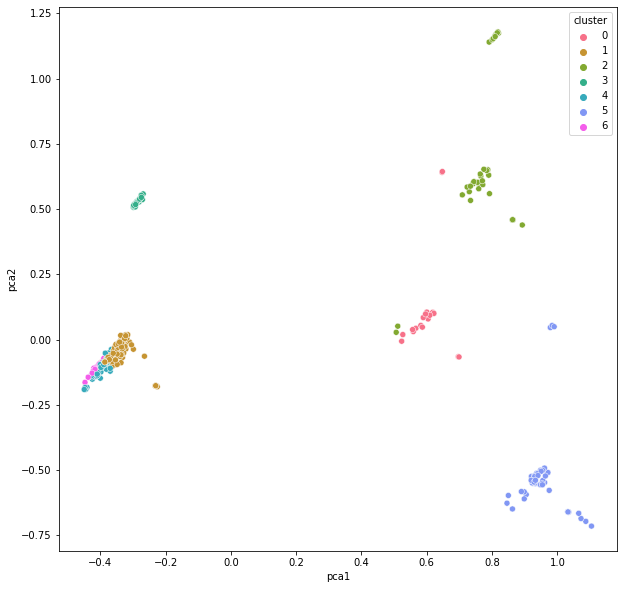

In [123]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.set_palette("tab10")
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df,
                palette=sns.color_palette("husl",n_clusters)
)
plt.show()